I start by importing the necessary libraries for my Exploratory Data Analysis tasks in Python.

In [92]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from dateutil import parser
import datetime as dt
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects

<a id='dataset'></a>  

## 📊 <span style="color: #20479b; font-weight: bold;">Importing Dataset</span>

In [93]:
df = pd.read_csv('/Users/jasonjoelpinto/Downloads/Challenges Foreign Students Face When Learning German_ An Empirical Analysis (Responses) - Form Responses 1.csv')

print("No. of rows.   :", df.shape[0])
print("No. of cols.   :", df.shape[1])  
print("="*30)

df['What resources are you using to learn German (e.g., textbooks, online courses, language exchange programs)?'].unique()
df.head()

No. of rows.   : 29
No. of cols.   : 32


,Timestamp,"Consent: By submitting this survey, you consent to the use of your responses for research purposes.",What is your Full Name?,How long have you been learning German?,What is your native language?,[Other language- Please specify here.],"Have you studied any other languages before starting German? If yes, which one?",Please specify other language you studied.,"What resources are you using to learn German (e.g., textbooks, online courses, language exchange programs)?","Other Resources, please specify,",...,"Others, please specify: ____________.1",How often do you get the opportunity to practice German outside of class?,"\nDo you feel that living in Germany has helped your language learning? If so, how?","If yes, please specify: ____________",What kind of support do you wish you had more of in your German learning journey?,"Have you used any language learning apps or software for learning German? If so, how helpful have you found them?","Yes, please specify: ____________.1",How motivated do you feel to continue learning German?,Have you faced any challenges in adjusting to the academic expectations of German-speaking institutions?,What advice would you give to other international students who are just starting to learn German?
0,3/15/2024 12:00:05,I consent,Anil Reddy,Less than 6 months,[Other: Please specify],Telugu,"Yes, please specify: ____________","English, Hindi",Language learning apps,"Duolingo, YouTube, Udemy",...,online translations and while speaking,Occasionally,"Yes, please specify: ____________","Pedestrians, Store Managers, Store Employees, ...","Conversation practice opportunities, Cultural ...","Yes, please specify: ____________","Duolingo, udemy",Somewhat motivated,Yes,Learn German as many ways as possible and try ...
1,3/15/2024 12:01:45,I consent,Sujan sighn,Less than 6 months,Hindi,NaN,"Yes, please specify: ____________",Punjabi,Online courses,NaN,...,NaN,Occasionally,No,NaN,"Tutoring, Language exchange partners, Conversa...","Yes, please specify: ____________",Youtube,Somewhat motivated,No,Make some german local friends
2,3/15/2024 23:18:54,I consent,Anshula Sonkusare,Less than 6 months,[Other: Please specify],Marathi,No,NaN,Online courses,NaN,...,NaN,Occasionally,"Yes, please specify: ____________",As you face problem to communicate citizens in...,"Conversation practice opportunities, Cultural ...","Yes, please specify: ____________",Duolingo,Somewhat motivated,No,Never underestimate german language. It’s powe...
3,3/16/2024 15:07:38,I consent,Mohana Krishnan Subramanian,Less than 6 months,[Other: Please specify],Tamil,No,NaN,Online courses,NaN,...,NaN,Rarely,"Yes, please specify: ____________",Listening to day to day constant conversation ...,"Tutoring, Language exchange partners, Cultural...","Yes, please specify: ____________",Duolingo,Very motivated,Yes,Have a mentality of it's just language rather ...
4,3/16/2024 15:46:17,I consent,Abhinav Sikhwal,Less than 6 months,English,NaN,"Yes, please specify: ____________",Spanish,Language learning apps,NaN,...,NaN,Rarely,"Yes, please specify: ____________",By Using it everywhere,"Tutoring, Conversation practice opportunities","Yes, please specify: ____________",Duolingo,Somewhat motivated,No,Keep Practicing everyday


In [94]:
new_df = pd.DataFrame(columns=['Support'])

# Function to split comma-separated values and insert into new DataFrame
def split_and_insert(row):
    for index, row in df.iterrows():
        for value in row['col2'].split(','):
            print(f"Row {index}: {value}")




In [95]:
column_name = 'What kind of support do you wish you had more of in your German learning journey?'
new_df = pd.DataFrame()

# Iterate over the specified column
for index, values in enumerate(df[column_name]):
    # print(values)
    for value in values.split(', '):
        # new_row = {'support': value, 'count': '1'}
        if any(new_df['support'] == value):
            # Increment the count if it exists
            new_df.loc[new_df['support'] == value, 'count'] += 1
        else:
            # Otherwise, add a new row with count 1
            new_df = new_df.append({'support': value, 'count': 1}, ignore_index=True)

        # print(f"Row {index}: {value}")
new_df

KeyError: 'support'

['Conversation practice opportunities', 'Cultural immersion experiences', 'Tutoring', 'Language exchange partners', 'Conversation practice opportunities', 'Conversation practice opportunities', 'Cultural immersion experiences', 'Tutoring', 'Language exchange partners', 'Cultural immersion experiences', 'Tutoring', 'Conversation practice opportunities', 'Tutoring', 'Conversation practice opportunities', 'Cultural immersion experiences', 'Tutoring', 'Language exchange partners', 'Conversation practice opportunities', 'Cultural immersion experiences', 'Conversation practice opportunities', 'Language exchange partners', 'Conversation practice opportunities', 'Cultural immersion experiences', 'Tutoring', 'Language exchange partners', 'Language exchange partners', 'Conversation practice opportunities', 'Cultural immersion experiences', 'Conversation practice opportunities', 'Conversation practice opportunities', 'Cultural immersion experiences', 'Tutoring', 'Conversation practice opportuniti

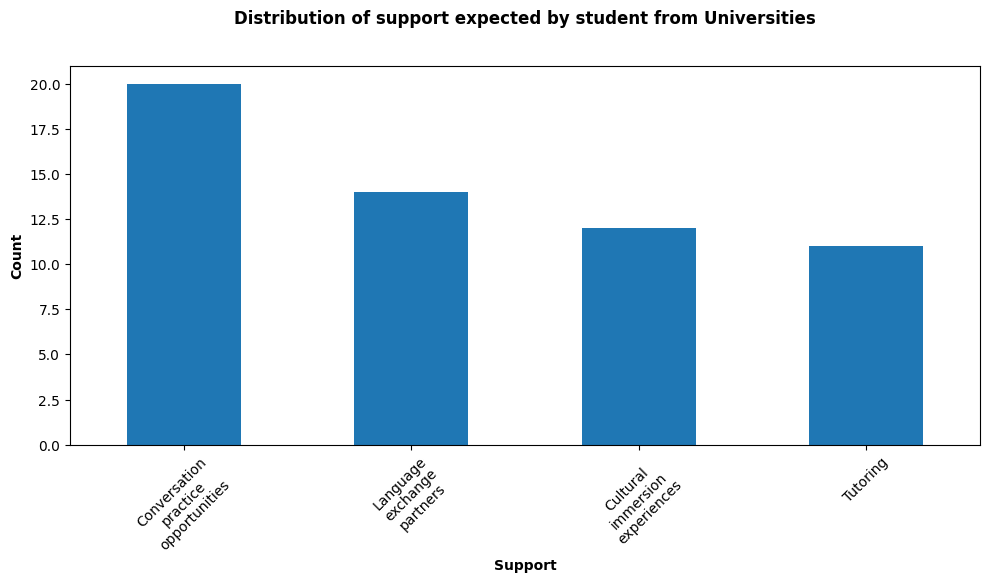

In [ ]:
column_name = 'What kind of support do you wish you had more of in your German learning journey?'
support_list = []

# Iterate over the specified column
for values in df[column_name]:
    for value in values.split(', '):
        # Check if the value already exists in the DataFrame
        support_list.append(value)

print(support_list)

new_df = pd.DataFrame(support_list, columns=['support'])
new_df

plt.figure(figsize=(10, 6))
new_df['support'].value_counts().plot(kind='bar')
plt.title('Distribution of support expected by student from Universities', fontweight='bold', y=1.09)
plt.xlabel('Support', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
tick_labels = [label.replace(' ', '\n') for label in new_df['support'].value_counts().index]
plt.xticks(range(len(tick_labels)), tick_labels,rotation=45)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Propotion of time availablity')

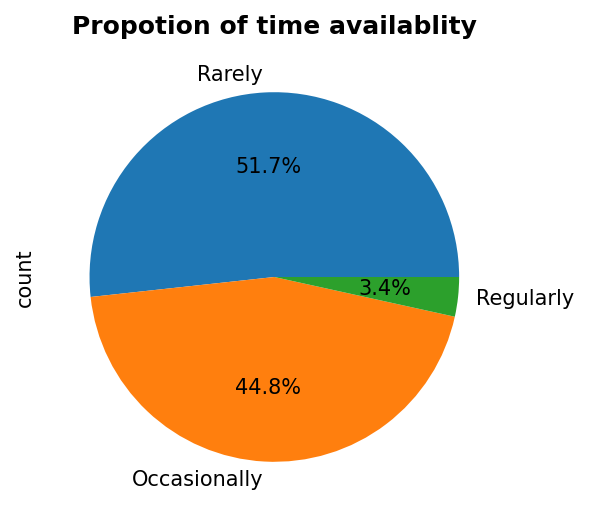

In [ ]:
plt.figure(figsize=(8,4),dpi=150)
df1 = df['How often do you get the opportunity to practice German outside of class?'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Propotion of time availablity', fontweight='bold')


['Language learning apps', 'Online courses', 'Online courses', 'Online courses', 'Language learning apps', 'Online courses', 'Language learning apps', 'Textbooks', 'Language learning apps', 'Language learning apps', 'Online courses', 'Online courses', 'Textbooks', 'Language learning apps', 'Language exchange programs', 'Online courses', 'Textbooks', 'Language learning apps', 'Online courses', 'Language learning apps', 'Others', 'please specify: ____________', 'Online courses', 'Language exchange programs', 'Online courses', 'Online courses', 'Online courses', 'Language learning apps', 'Language learning apps', 'Online courses']


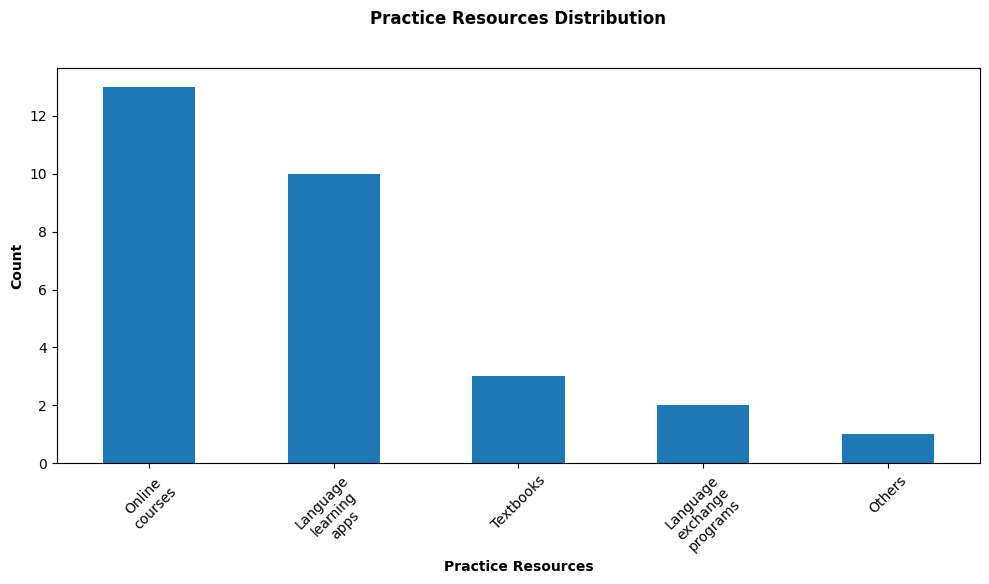

,support
0,Language learning apps
1,Online courses
2,Online courses
3,Online courses
4,Language learning apps
5,Online courses
6,Language learning apps
7,Textbooks
8,Language learning apps
9,Language learning apps


In [99]:
column_name = 'What resources are you using to learn German (e.g., textbooks, online courses, language exchange programs)?'
support_list = []

# Iterate over the specified column
for values in df[column_name]:
    for value in values.split(', '):
        # Check if the value already exists in the DataFrame
        support_list.append(value)

print(support_list)

new_df = pd.DataFrame(support_list, columns=['support'])
new_df

ignore_value = 'please specify: ____________'
new_df = new_df[new_df['support'] != ignore_value]

plt.figure(figsize=(10, 6))
new_df['support'].value_counts().plot(kind='bar')
plt.title('Practice Resources Distribution', fontweight='bold', y=1.09)
plt.xlabel('Practice Resources', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
tick_labels = [label.replace(' ', '\n') for label in new_df['support'].value_counts().index]
plt.xticks(range(len(tick_labels)), tick_labels,rotation=45)

plt.tight_layout()
plt.show()

new_df

Text(0.5, 1.0, 'Proportion of time availability fig-8')

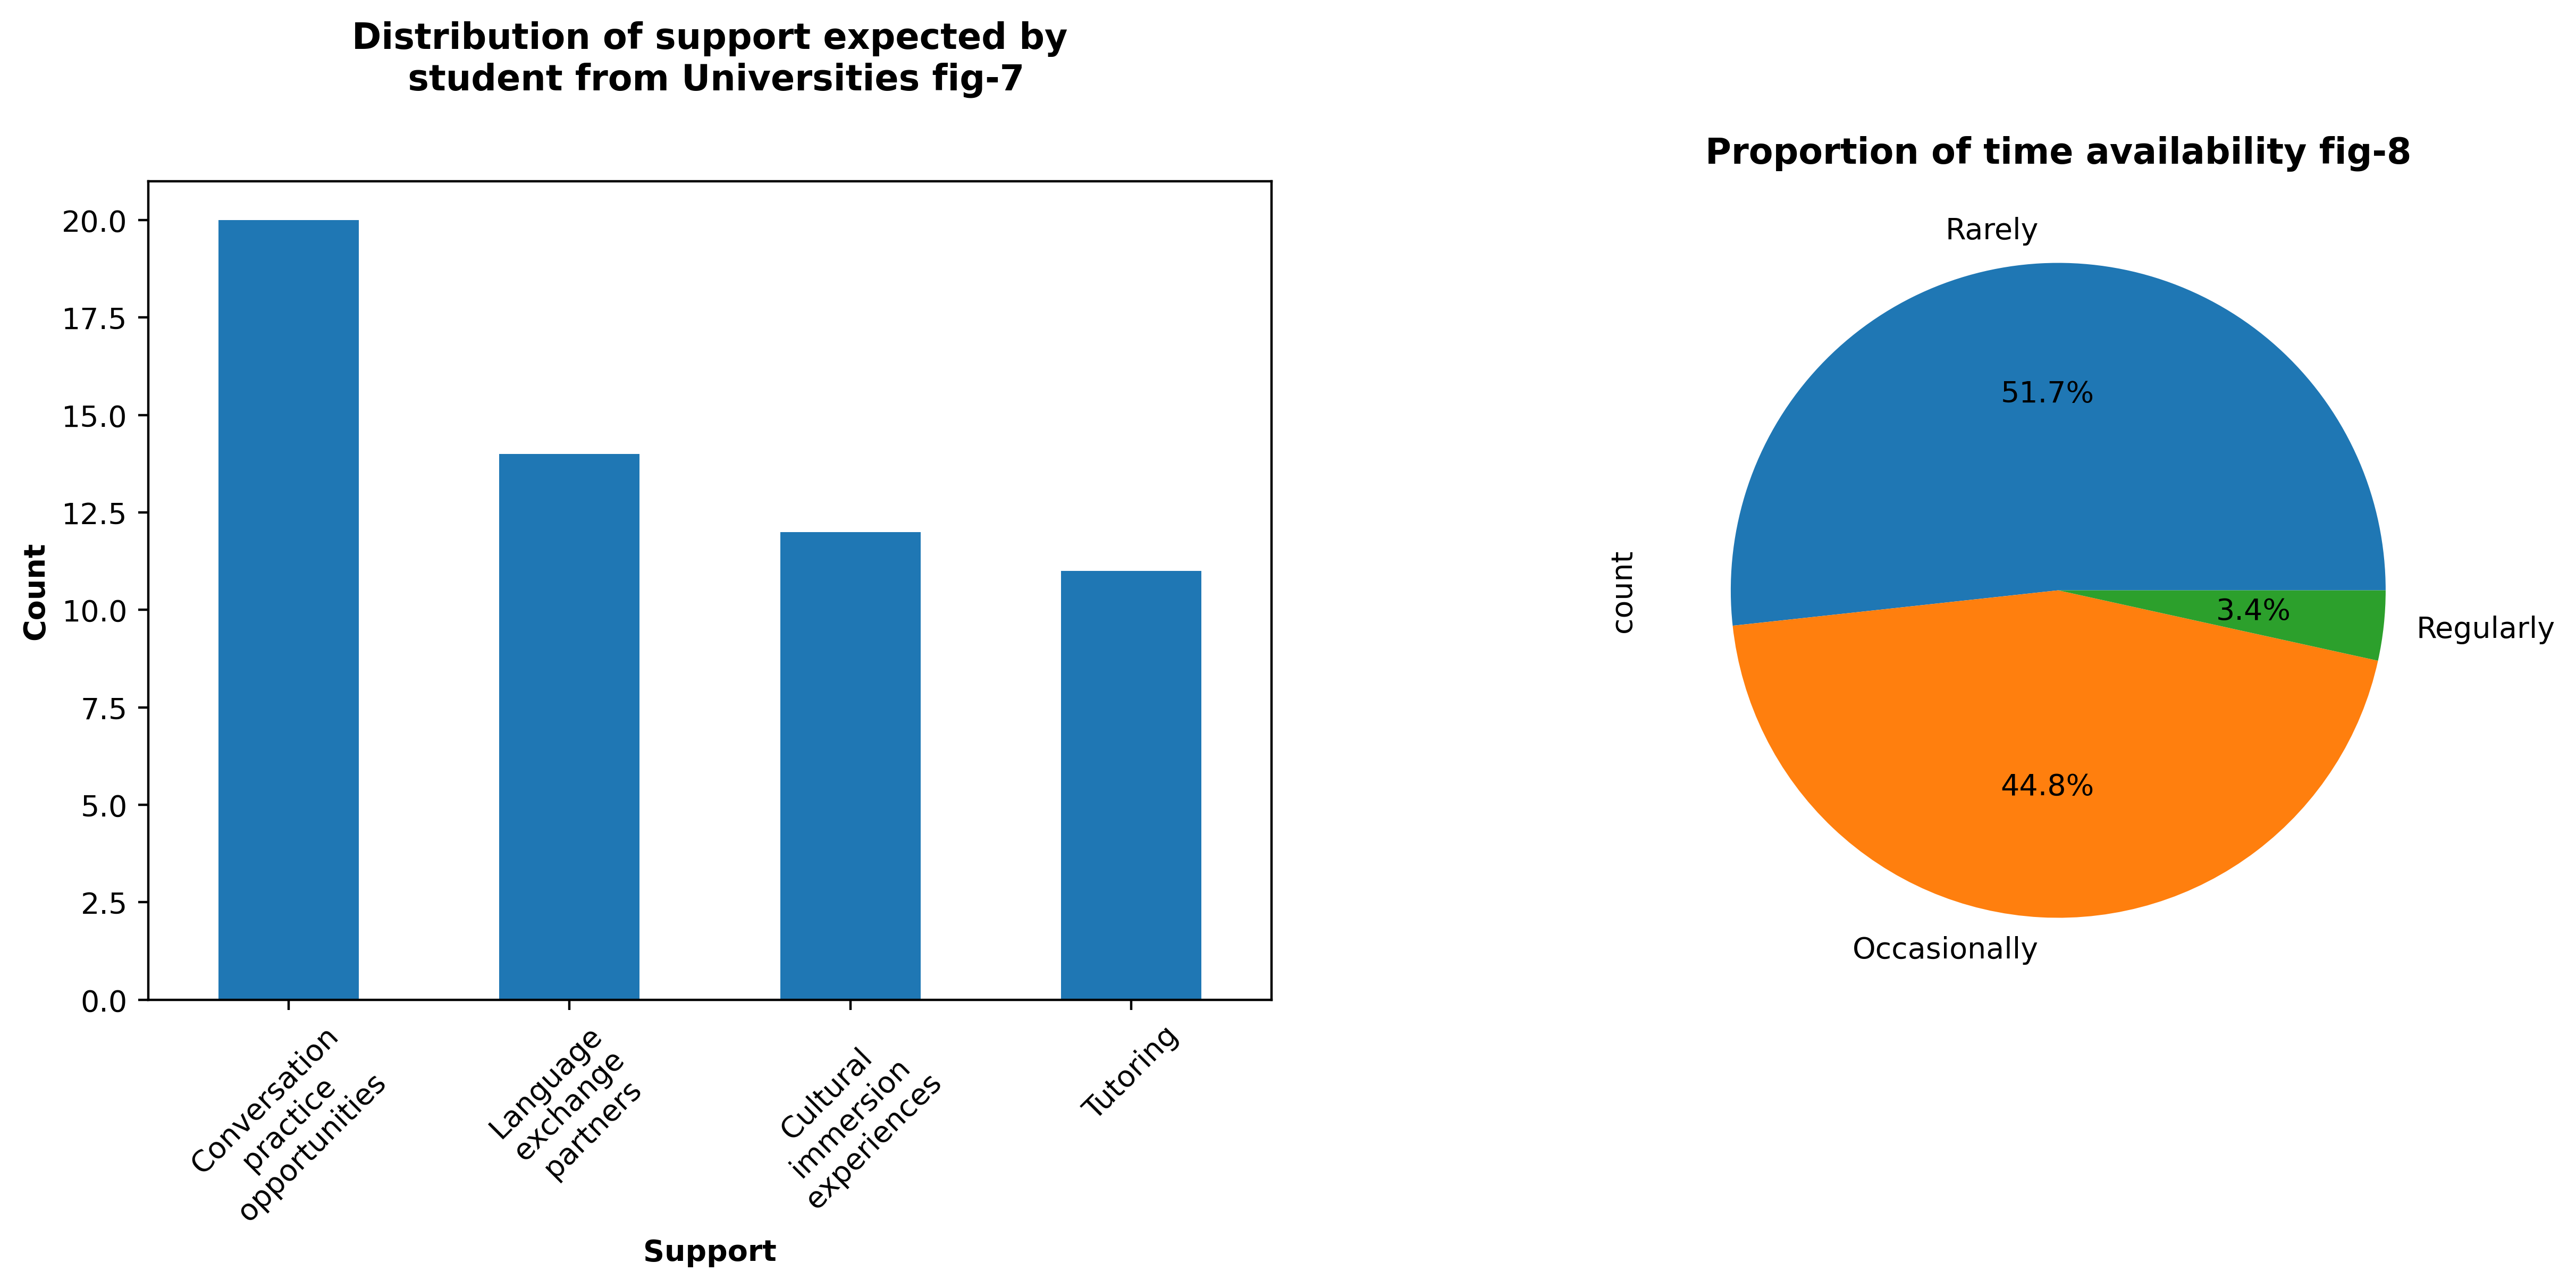

In [121]:
# First subplot: Distribution of support expected by student from Universities
column_name = 'What kind of support do you wish you had more of in your German learning journey?'
support_list = []

# Iterate over the specified column
for values in df[column_name]:
    for value in values.split(', '):
        # Check if the value already exists in the DataFrame
        support_list.append(value)

new_df = pd.DataFrame(support_list, columns=['support'])

plt.figure(figsize=(15, 5),dpi=400)

plt.subplot(1, 2, 1)
new_df['support'].value_counts().plot(kind='bar')
plt.title('Distribution of support expected by\n student from Universities fig-7', fontweight='bold', y=1.09)
plt.xlabel('Support', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
tick_labels = [label.replace(' ', '\n') for label in new_df['support'].value_counts().index]
plt.xticks(range(len(tick_labels)), tick_labels, rotation=45)

# Second subplot: Proportion of time availability
plt.subplot(1, 2, 2)
df['How often do you get the opportunity to practice German outside of class?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of time availability fig-8', fontweight='bold')




Text(0.5, 1.0, 'Proportion of time availability fig-10')

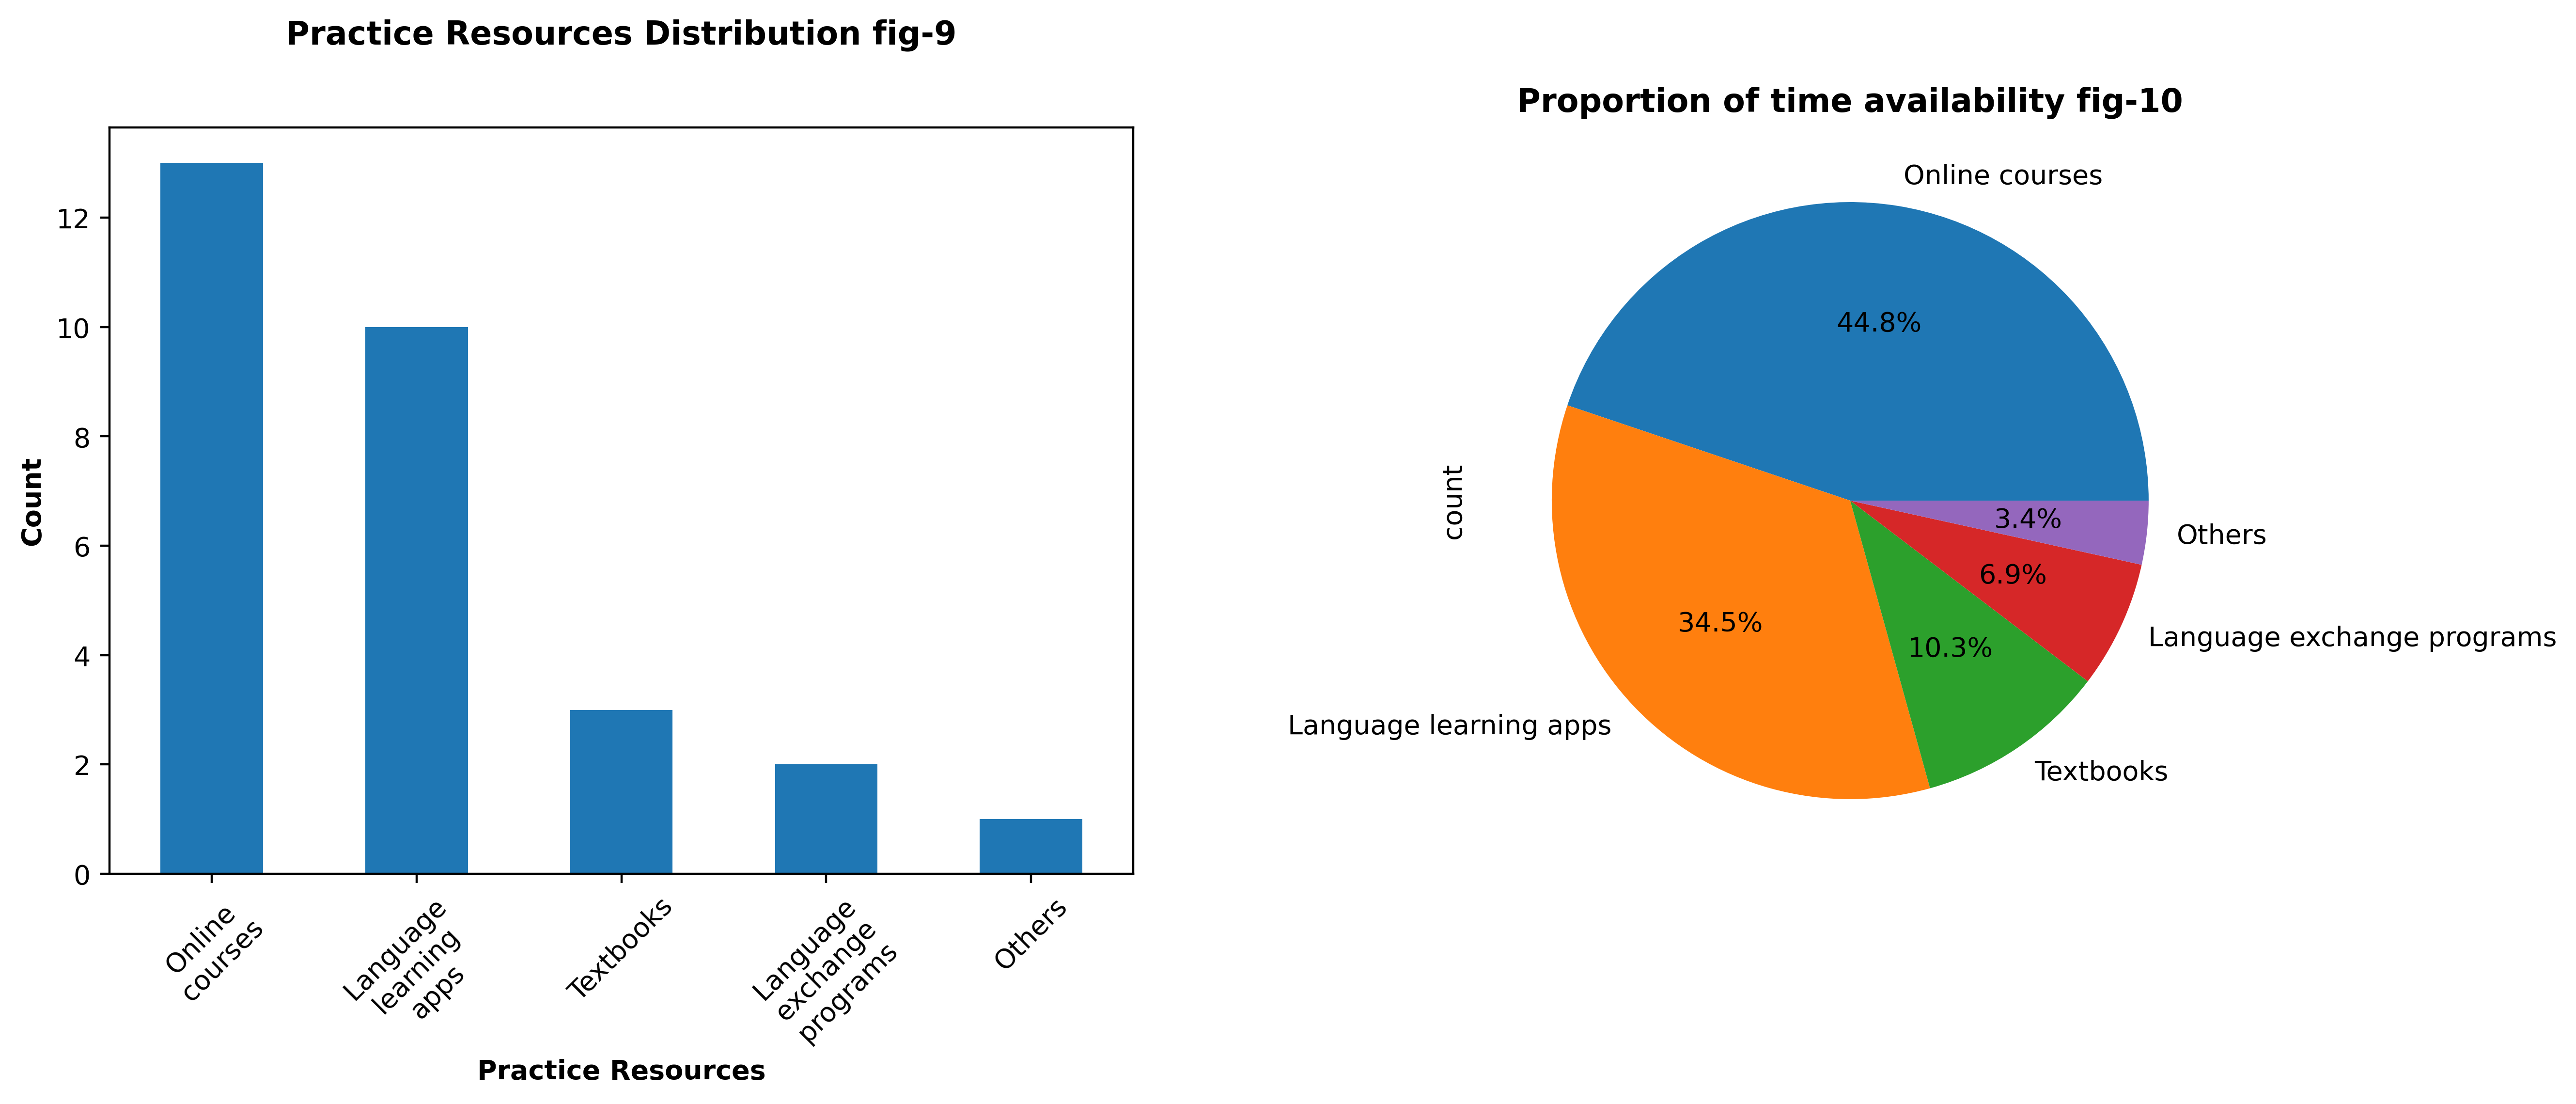

In [120]:
column_name = 'What resources are you using to learn German (e.g., textbooks, online courses, language exchange programs)?'
support_list = []

# Iterate over the specified column
for values in df[column_name]:
    for value in values.split(', '):
        # Check if the value already exists in the DataFrame
        support_list.append(value)

new_df = pd.DataFrame(support_list, columns=['support'])

ignore_value = 'please specify: ____________'
new_df = new_df[new_df['support'] != ignore_value]

plt.figure(figsize=(15, 5),dpi=400)

plt.subplot(1, 2, 1)
new_df['support'].value_counts().plot(kind='bar')
plt.title('Practice Resources Distribution fig-9', fontweight='bold', y=1.09)
plt.xlabel('Practice Resources', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
tick_labels = [label.replace(' ', '\n') for label in new_df['support'].value_counts().index]
plt.xticks(range(len(tick_labels)), tick_labels, rotation=45)


# Second subplot: Proportion of time availability
plt.subplot(1, 2, 2)
column_name = 'What resources are you using to learn German (e.g., textbooks, online courses, language exchange programs)?'
support_list = []
for values in df[column_name]:
    for value in values.split(', '):
        # Check if the value already exists in the DataFrame
        support_list.append(value)

new_df = pd.DataFrame(support_list, columns=['support'])

ignore_value = 'please specify: ____________'
new_df = new_df[new_df['support'] != ignore_value]

new_df['support'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of time availability fig-10', fontweight='bold')




# new_df['support'].value_counts().plot(kind='bar')
# plt.title('Practice Resources Distribution', fontweight='bold', y=1.09)
# plt.xlabel('Practice Resources', fontweight='bold')
# plt.ylabel('Count', fontweight='bold')
# tick_labels = [label.replace(' ', '\n') for label in new_df['support'].value_counts().index]
# plt.xticks(range(len(tick_labels)), tick_labels, rotation=45)
# df['How often do you get the opportunity to practice German outside of class?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
# plt.title('Proportion of time availability', fontweight='bold')